# U.S. Medical Insurance Costs

Importando e zipando toda informação no arquivo csv como conjuntos na lista.

Importing and zipping every information on the csv file as tuples in a list.

In [1]:
import csv

list_of_ages = []
list_of_sex = []
list_of_bmi = []
list_of_children = []
list_of_smoker = []
list_of_region = []
list_of_charges = []

with open("insurance.csv", newline = "") as insurance_csv:
    insurance_reader = csv.DictReader(insurance_csv, delimiter=",")
    for row in insurance_reader:
        list_of_ages.append(row["age"])
        list_of_sex.append(row["sex"])
        list_of_bmi.append(row["bmi"])
        list_of_children.append(row["children"])
        list_of_smoker.append(row["smoker"])
        list_of_region.append(row["region"])
        list_of_charges.append(row["charges"])

zipped_info = list(zip(list_of_ages, list_of_sex, list_of_bmi, list_of_children, list_of_smoker, list_of_region, list_of_charges))
zipped_info

[('19', 'female', '27.9', '0', 'yes', 'southwest', '16884.924'),
 ('18', 'male', '33.77', '1', 'no', 'southeast', '1725.5523'),
 ('28', 'male', '33', '3', 'no', 'southeast', '4449.462'),
 ('33', 'male', '22.705', '0', 'no', 'northwest', '21984.47061'),
 ('32', 'male', '28.88', '0', 'no', 'northwest', '3866.8552'),
 ('31', 'female', '25.74', '0', 'no', 'southeast', '3756.6216'),
 ('46', 'female', '33.44', '1', 'no', 'southeast', '8240.5896'),
 ('37', 'female', '27.74', '3', 'no', 'northwest', '7281.5056'),
 ('37', 'male', '29.83', '2', 'no', 'northeast', '6406.4107'),
 ('60', 'female', '25.84', '0', 'no', 'northwest', '28923.13692'),
 ('25', 'male', '26.22', '0', 'no', 'northeast', '2721.3208'),
 ('62', 'female', '26.29', '0', 'yes', 'southeast', '27808.7251'),
 ('23', 'male', '34.4', '0', 'no', 'southwest', '1826.843'),
 ('56', 'female', '39.82', '0', 'no', 'southeast', '11090.7178'),
 ('27', 'male', '42.13', '0', 'yes', 'southeast', '39611.7577'),
 ('19', 'male', '24.6', '1', 'no', 's

Analizando a diversidade das regiões na base de dados.

Analyzing the diversity of regions on the database.

In [2]:

unique_regions = []
for row in zipped_info:
    if row[5] not in unique_regions:
        unique_regions.append(row[5])

count_southwest = list_of_region.count("southwest")
count_northwest = list_of_region.count("northwest")
count_southeast = list_of_region.count("southeast")
count_northeast = list_of_region.count("northeast")
total_data = count_northeast + count_northwest + count_southeast + count_southwest
pct_sw = round(count_southwest/total_data * 100, 2) 
pct_nw = round(count_northwest/total_data * 100, 2)
pct_se = round(count_southeast/total_data * 100, 2)
pct_ne = round(count_northeast/total_data * 100, 2)
print(unique_regions, count_southwest, count_northwest, count_southeast, count_northeast)
print(pct_sw,pct_nw,pct_se,pct_ne)

['southwest', 'southeast', 'northwest', 'northeast'] 325 325 364 324
24.29 24.29 27.2 24.22


Como podemos ver, as regiões na base de dados são quase igualmente distribuídas. Aproximadamente 25% dos dados são de cada região(Sudoeste, Noroeste, Sudoeste, Nordeste).

As we can see the regions in the database are almost equaly distributed. Aproximately 25% of data  are from each region(Southwest, Northwest, Southeast, Northeast).



Na proxima linha de código farei o mesmo para o sexo, número de filhos e indivíduos fumantes e não fumantes. Como o esperado é que a quantidade de filhos apresente uma variedade baixa resolvi tentar agrupálos, mesmo sabendo que é uma variável quantitativa. 

In the next line of code I will do the same for sex, number of children and smoker or non-smoker. The expected is that the number of kids variable do not return a high variety, given that I tried to group the values together, even though I know it is a quantitative variable.

In [3]:
unique_sex = []
for row in zipped_info:
    if row[1] not in unique_sex:
        unique_sex.append(row[1])

count_female = list_of_sex.count("female")
count_male = list_of_sex.count("male")
#unique_sex
pct_female = round(count_female/total_data * 100, 2)
pct_male = round(count_male/total_data * 100, 2)
#print(unique_sex, count_female, count_male, pct_female,pct_male)

unique_children = []
for row in zipped_info:
    if row[3] not in unique_children:
        unique_children.append(row[3])

unique_children.sort()
#unique_children
pct_children_list = []
for children in unique_children:
    pct_children_list.append(round(list_of_children.count(children)/total_data * 100, 2))
#pct_children_list

count_smoker = 0
count_non_smoker = 0
for smoking in list_of_smoker:
    if smoking == "yes":
        count_smoker += 1
    else:
        count_non_smoker += 1

pct_smoker = []
pct_smoker.append(round(count_smoker/total_data * 100, 2))
pct_smoker.append(round(count_non_smoker/total_data * 100, 2))
print(unique_sex, pct_female, pct_male)
print(unique_children, pct_children_list)
print("Smoker, Non-smoker", pct_smoker)



['female', 'male'] 49.48 50.52
['0', '1', '2', '3', '4', '5'] [42.9, 24.22, 17.94, 11.73, 1.87, 1.35]
Smoker, Non-smoker [20.48, 79.52]


Como podemos ver a porcentagem de dados do gênero masculino e feminino é muito próxima. Além disso, podemos ver que a quantidade de filhos decresce quase exponencialmente no nossa banco de dados. Já a porcentagem de fumantes e não fumantes é muito diferente no nosso banco de dados.

As we can see the percentage of males and females in our database is very similar. On the other han the amount children every individual has decreases almost in an exponential scale. The percentage of smokers and non-smokers are very different in our database.

Agora tentaremos analisar se há diferença no custo do seguro para indivíduos do sexo masculino ou feminino visto que temos uma quantidade quase idêntica de indivíduos de cada sexo.

Now we will try to analyze if there is a difference in the insurance cost for individuals of the male and female gender given that we have a similar amount of individuals of each sex.

In [4]:
total_cost_female = 0
total_cost_male = 0
for tuple in zipped_info:
    if "female" in tuple:
        total_cost_female += float(tuple[6])

for tuple in zipped_info:
    if "male" in tuple:
        total_cost_male += float(tuple[6])

average_cost_female = total_cost_female/count_female
average_cost_male = total_cost_male/count_male

print(average_cost_female, average_cost_male)
print(average_cost_male/average_cost_female*100)


12569.57884383534 13956.751177721886
111.03594918430282


A média do custo do seguro para homens é 11% maior que para mulheres. Mas esse dado sozinho não é o bastante para entender a situação, nós devemos considerar se existem mais homens fumantes que mulheres, suas idades, número de filhos e toda combinação possível e adequada. Mesmo assim, o dado significa algo. Agora vou tentar analisar como essas outras variáveis afetam o custo do seguro.

The average male has an insurance cost 11% more expensive than females. But that data alone is not enough to understand the whole picture, we should consider males and females in similar conditions, smoker or non-smoker, considering the age and every adequate combination we can get from our database. However it is something. Now i'll try to analyze how these other variables affect the insurance cost.

In [5]:
#Percentage of male and female smokers
male_smokers = 0
female_smokers = 0
for tuple in zipped_info:
    if tuple[1] == "male" and tuple[4] == "yes":
        male_smokers += 1
for tuple in zipped_info:
    if tuple[1] == "female" and tuple[4] == "yes":
        female_smokers += 1

print(male_smokers, female_smokers)

pct_male_female_smokers = male_smokers/female_smokers*100

print(round(pct_male_female_smokers, 2))


#Percentage of male and female elders
elder_male = 0
elder_female = 0
for tuple in zipped_info:
    if int(tuple[0]) >= 60 and tuple[1] == "male":
        elder_male += 1
    if int(tuple[0]) >= 60 and tuple[1] == "female":
        elder_female += 1

pct_male_female_elders = elder_female/elder_male*100

print(round(pct_male_female_elders, 2))

159 115
138.26
103.57


Agora podemos ver que existem aproximadamente 38,26% mais fumantes do gênero masculino em relação ao sexo feminino, isso já pode ser um bom indicador do porquê o seguro masculino é em média mais caro.

Now we can see that there are aproximately 38.26% more smokers of the male gender, that can explain in part why the insurance for the male individuals are more expensive.

In [6]:
#Average cost for a smoker and non-smoker individual
total_cost_smoker = 0
total_cost_non_smoker = 0
for tuple in zipped_info:
    if tuple[4] == "yes":
        total_cost_smoker += float(tuple[6])
    else:
        total_cost_non_smoker += float(tuple[6])

print(total_cost_smoker, total_cost_non_smoker)
average_smoker = total_cost_smoker/count_smoker
average_non_smoker = total_cost_non_smoker/count_non_smoker
print(round(average_smoker, 2), round(average_non_smoker, 2))
print(round(average_smoker - average_non_smoker, 2))
pct_cost_smokers = average_smoker/average_non_smoker*100

print(round(pct_cost_smokers, 2))



8781763.52184 8974061.468918996
32050.23 8434.27
23615.96
380.0


Aqui podemos ver que o indivíduo não fumante paga 280% menos que um indivíduo fumante.

Here we can see that an individual that smokes pays 280% more than a non-smoker.

Agora veremos como o índice de massa corporal afeta o preço do seguro. Vamos simplificar as categorias, considerando as categorias: Abaixo do peso(BMI <= 18.4), Normal(18.5 <= BMI <= 24.9 ), Acima do peso(25.0 <= BMI <= 29.9) e Obesidade(BMI >= 30).

Now we will see how the Body Mass Index affects the cost of the insurance. We will simplify the categories, considering the following: Underweight(BMI <= 18.4), Normal(18.5 <= BMI <= 24.9 ), Overweight (25.0 <= BMI <= 29.9) and Obese(BMI >= 30).

In [7]:
count_underweight = 0
count_normal = 0
count_overweight = 0
count_obese = 0
for tuple in zipped_info:
    if float(tuple[2]) <= 18.4000:
        count_underweight += 1
    elif float(tuple[2]) >= 18.5000 and float(tuple[2]) <= 24.9000:
        count_normal += 1
    elif float(tuple[2]) >= 25.0000 and float(tuple[2]) <= 29.9000:
        count_overweight += 1
    else:
        count_obese += 1

cost_underweight = 0
cost_normal = 0
cost_overweight = 0
cost_obese = 0

for tuple in zipped_info:
    if float(tuple[2]) <= 18.4000:
        cost_underweight += float(tuple[6])
    elif float(tuple[2]) >= 18.5000 and float(tuple[2]) <= 24.9000:
        cost_normal += float(tuple[6])
    elif float(tuple[2]) >= 25.0000 and float(tuple[2]) <= 29.9000:
        cost_overweight += float(tuple[6])
    else:
        cost_obese += float(tuple[6])

print(count_underweight, count_normal, count_overweight, count_obese)
print(cost_underweight, cost_normal, cost_overweight, cost_obese)

avg_cost_under = cost_underweight/count_underweight
avg_cost_normal = cost_normal/count_normal
avg_cost_over = cost_overweight/count_overweight
avg_cost_obese = cost_obese/count_obese
print(avg_cost_under, avg_cost_normal, avg_cost_over, avg_cost_obese)


20 222 377 719
177044.01170000003 2304248.9405400003 4144735.751999 11129796.286519997
8852.200585000002 10379.499732162163 10993.994037132627 15479.549772628647


Agora podemos notar que o Índice de massa corporal afeta consideravelmente o preço do seguro, principalmente quando o indivíduo entra na faixa de obesidade. Em seguida vou tentar criar modelos de regressão linear considerando o custo e o Índice de massa corporal.

Now we can notice that the BMI greatly affects the insurcance cost, specially when the individual enters the obese range. In the following code i will try to creat linear regression models considering the cost of the insurance and the individual's BMI.

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression
import plotly.express as px
predicting_bmi_cost = LinearRegression()
type(predicting_bmi_cost)


sklearn.linear_model._base.LinearRegression

In [9]:
from array import array
list_of_bmi = np.array(list_of_bmi, dtype=float)
list_of_charges = np.array(list_of_charges, dtype=float)
list_of_bmi = list_of_bmi.reshape(-1, 1)
list_of_charges = list_of_charges.reshape(-1, 1)

In [10]:
predicting_bmi_cost.fit(list_of_bmi, list_of_charges)

LinearRegression()

In [11]:
predicting_bmi_cost.intercept_

array([1192.93720896])

In [12]:
predicting_bmi_cost.coef_

array([[393.8730308]])

In [13]:
predicting_cost = predicting_bmi_cost.predict(list_of_bmi)
list_of_bmi

array([[27.9 ],
       [33.77],
       [33.  ],
       ...,
       [36.85],
       [25.8 ],
       [29.07]])

In [14]:
list_of_bmi.ravel()

array([27.9 , 33.77, 33.  , ..., 36.85, 25.8 , 29.07])

In [15]:
list_of_charges.ravel()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [16]:
ploting = px.scatter(x = list_of_bmi.ravel(), y = list_of_charges.ravel())
ploting.show()

In [17]:
ploting.add_scatter(x = list_of_bmi.ravel(), y = predicting_cost.ravel(), name = "Predictions")
ploting.show()

Como muitas variáveis afetam o custo do seguro, podemos ver pelo gráfico que uma simples regressão linear tentando prever o custo do seguro através do Índice de massa corporal não é o bastante.

Given that many other variables affect the insurance cost, we can see in the chart that a simple linear regression can not predict the insurance cost through the BMI.

In [18]:
from sklearn.cluster import KMeans
import pandas as pd

In [19]:
def calculate_wcss(info):
  wcss = []
  for k in range(1, 11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X=info)
    wcss.append(kmeans.inertia_)
  return wcss

In [20]:
list_of_smoker_numerical = []
for tuple in list_of_smoker:
    if tuple == "yes":
        list_of_smoker_numerical.append(1)
    else:
        list_of_smoker_numerical.append(0)

list_of_BMI_float = []
for tuple in list_of_bmi:
    list_of_BMI_float.append(float(tuple))
#print(list_of_BMI_float)

list_of_charges_float = []
for tuple in list_of_charges:
    list_of_charges_float.append(float(tuple))

list_of_ages_float = []
for tuple in list_of_ages:
    list_of_ages_float.append(float(tuple))

#list_of_sex_float = []
#for tuple in list_of_sex:
    #if tuple == "female":
        #list_of_ages_float.append(0)
    #else:
        #list_of_ages_float.append(1)

#print(list_of_smoker_numerical)

zipped_info = list(zip(list_of_ages, list_of_sex, list_of_bmi, list_of_children, list_of_smoker, list_of_region, list_of_charges, list_of_smoker_numerical, list_of_BMI_float, list_of_charges_float, list_of_ages_float))
#print(zipped_info)

In [21]:
info = pd.DataFrame(zipped_info, columns=["Age", "Sex", "BMI", "Children", "Smoker", "Region", "Charges", "Smoker Numerical", "BMI Float", "Charges Float", "Ages Float"])
info

,Age,Sex,BMI,Children,Smoker,Region,Charges,Smoker Numerical,BMI Float,Charges Float,Ages Float
0,19,female,[27.9],0,yes,southwest,[16884.924],1,27.900,16884.92400,19.0
1,18,male,[33.77],1,no,southeast,[1725.5523],0,33.770,1725.55230,18.0
2,28,male,[33.0],3,no,southeast,[4449.462],0,33.000,4449.46200,28.0
3,33,male,[22.705],0,no,northwest,[21984.47061],0,22.705,21984.47061,33.0
4,32,male,[28.88],0,no,northwest,[3866.8552],0,28.880,3866.85520,32.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,[30.97],3,no,northwest,[10600.5483],0,30.970,10600.54830,50.0
1334,18,female,[31.92],0,no,northeast,[2205.9808],0,31.920,2205.98080,18.0
1335,18,female,[36.85],0,no,southeast,[1629.8335],0,36.850,1629.83350,18.0
1336,21,female,[25.8],0,no,southwest,[2007.945],0,25.800,2007.94500,21.0


In [22]:
info_BMI_charges = info[["BMI Float", "Charges Float"]]
info_BMI_charges

,BMI Float,Charges Float
0,27.900,16884.92400
1,33.770,1725.55230
2,33.000,4449.46200
3,22.705,21984.47061
4,28.880,3866.85520
...,...,...
1333,30.970,10600.54830
1334,31.920,2205.98080
1335,36.850,1629.83350
1336,25.800,2007.94500


In [23]:
wcss_BMI = calculate_wcss(info_BMI_charges)

c:\Users\W1nd0w5-10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.



In [24]:
type(wcss_BMI)

list

In [25]:
for i in range(len(wcss_BMI)):
  print(f"O cluster {i} possui valor de WCSS de: {wcss_BMI[i]}")

O cluster 0 possui valor de WCSS de: 196074271288.56744
O cluster 1 possui valor de WCSS de: 48014969101.122955
O cluster 2 possui valor de WCSS de: 22974312404.390133
O cluster 3 possui valor de WCSS de: 12124777274.518303
O cluster 4 possui valor de WCSS de: 8544612918.932243
O cluster 5 possui valor de WCSS de: 6166718985.518628
O cluster 6 possui valor de WCSS de: 4435934251.94315
O cluster 7 possui valor de WCSS de: 3499146673.523719
O cluster 8 possui valor de WCSS de: 2776800324.8461885
O cluster 9 possui valor de WCSS de: 2258790452.2601233


In [26]:
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go

In [27]:
grafico_wcss = px.line( x=range(1,11),
                       y=wcss_BMI
                       )
fig = go.Figure(grafico_wcss)

fig.update_layout(title = "Calculando o WCSS",
                  xaxis_title = "Número de clusters",
                  yaxis_title = "Valor do WCSS",
                  template = "plotly_white"
                  )
fig.show()

In [28]:
kmeans_BMI = KMeans(n_clusters = 3, random_state=0)
info["cluster"] = kmeans_BMI.fit_predict(info_BMI_charges)

In [29]:
center_cluster = kmeans_BMI.cluster_centers_
center_cluster

array([[3.04997317e+01, 6.60918399e+03],
       [2.86664739e+01, 1.96614470e+04],
       [3.50239172e+01, 4.10979122e+04]])

In [30]:
grafico = px.scatter(x = info["BMI Float"],
                     y = info["Charges Float"],
                     color= info["cluster"])

grafico_centroide = px.scatter(x = center_cluster[:,0], y = center_cluster[:,1], size = [7,7,7])
grafico_final_petala = go.Figure(data = grafico.data + grafico_centroide.data)
grafico_final_petala.show()

In [31]:
import seaborn as sns

In [32]:
info_smoker_charges = info[["Smoker", "Charges Float"]]
info_smoker_charges

,Smoker,Charges Float
0,yes,16884.92400
1,no,1725.55230
2,no,4449.46200
3,no,21984.47061
4,no,3866.85520
...,...,...
1333,no,10600.54830
1334,no,2205.98080
1335,no,1629.83350
1336,no,2007.94500


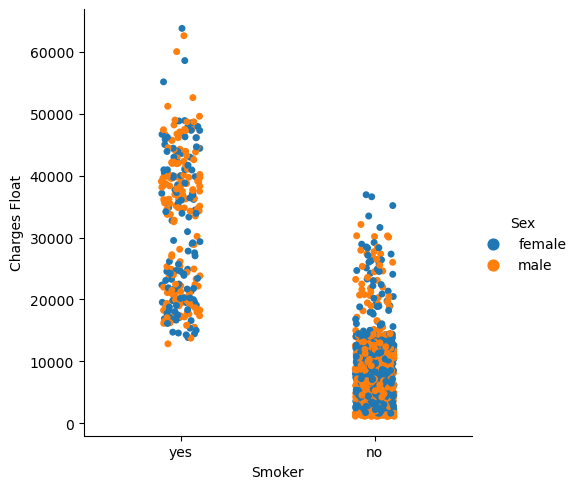

In [33]:
charges = sns.load_dataset("tips")
sns.catplot(data= info, x = "Smoker", y = "Charges Float", hue="Sex")

In [34]:
correlation = info.corr()
plot = sns.heatmap(correlation, annot=True, linewidths=.5)
plot
correlation

,Smoker Numerical,BMI Float,Charges Float,Ages Float,cluster
Smoker Numerical,1.000000,0.003750,0.787251,-0.025019,0.813199
BMI Float,0.003750,1.000000,0.198341,0.109272,0.148577
Charges Float,0.787251,0.198341,1.000000,0.299008,0.930641
Ages Float,-0.025019,0.109272,0.299008,1.000000,0.123587
cluster,0.813199,0.148577,0.930641,0.123587,1.000000
